# Describing the same data with summary statistics

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [ ]:
%%R

require('tidyverse')


### Read data

In [ ]:
%%R

# Read data
df <- read_csv('housing_data.csv')

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Charts from students

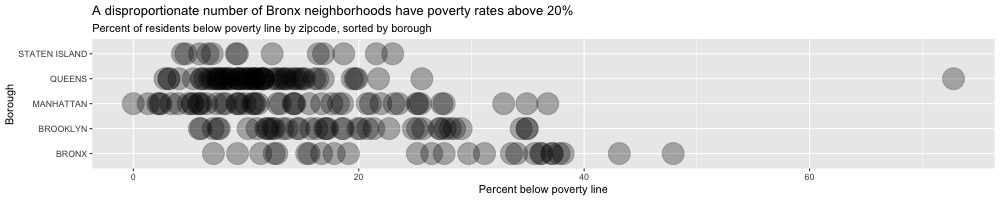

In [ ]:
%%R -w 1000 -h 200

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_point(alpha=.3, size=10) +
    labs(title = "A disproportionate number of Bronx neighborhoods have poverty rates above 20%", subtitle = "Percent of residents below poverty line by zipcode, sorted by borough", x = "Percent below poverty line", y="Borough")

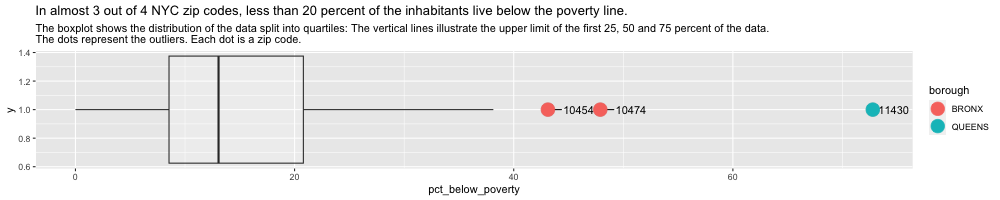

In [16]:
%%R -w 1000 -h 200

require('ggrepel')

#Function to find outliers
find_outlier <- function(x) {
  return(x < quantile(x, .25) - 1.5*IQR(x) | x > quantile(x, .75) + 1.5*IQR(x))
}

# Add outlier column with the zip code of the outlier.
outlier_df <- df %>%
        mutate(outlier = ifelse(find_outlier(pct_below_poverty), zip, NA)) %>%
        filter(!is.na(outlier))

# modify this code
ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_boxplot(alpha=.2,outlier.size=6) +
    geom_text_repel(data=outlier_df, aes(label=zip), hjust=-.5) +
    geom_point(data=outlier_df, size=6, aes(color=borough)) +
    labs(
    title = 'In almost 3 out of 4 NYC zip codes, less than 20 percent of the inhabitants live below the poverty line.',
    subtitle = 'The boxplot shows the distribution of the data split into quartiles: The vertical lines illustrate the upper limit of the first 25, 50 and 75 percent of the data.\nThe dots represent the outliers. Each dot is a zip code.'
    )

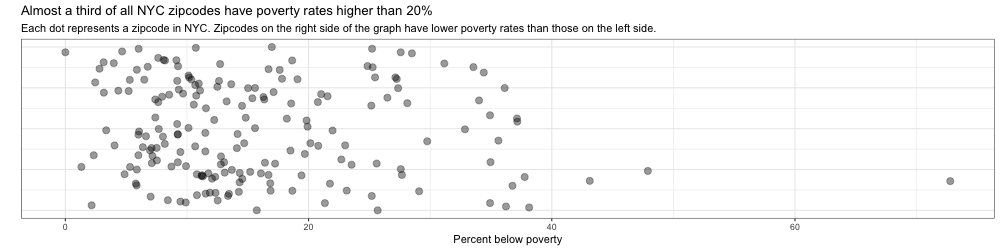

In [19]:
%%R -w 1000 -h 250

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_jitter(size=3, alpha=0.4) +
    labs(
        x = "Percent below poverty",
        y = "",
        title = "Almost a third of all NYC zipcodes have poverty rates higher than 20%",
        subtitle = "Each dot represents a zipcode in NYC. Zipcodes on the right side of the graph have lower poverty rates than those on the left side."
    ) +
    theme_bw() +
    theme(
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank() 
    )

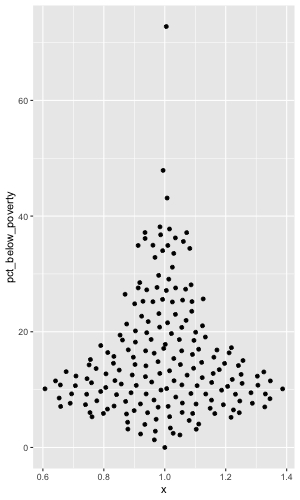

In [15]:
%%R -w 300 -h 500

require("ggbeeswarm")

ggplot(df,aes(x=1, y=pct_below_poverty)) + 
geom_quasirandom()



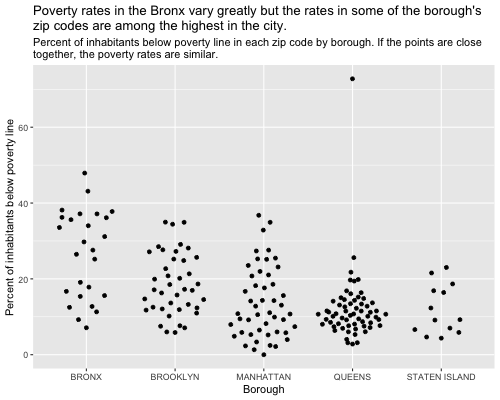

In [14]:
%%R -w 500 -h 400

library(ggbeeswarm)

ggplot(df,aes(x=borough, y=pct_below_poverty)) + 
geom_quasirandom() +
    labs(
        y = 'Percent of inhabitants below poverty line',
        x = 'Borough',
        title = "Poverty rates in the Bronx vary greatly but the rates in some of the borough's \nzip codes are among the highest in the city.",
        subtitle = 'Percent of inhabitants below poverty line in each zip code by borough. If the points are close \ntogether, the poverty rates are similar.'
    )

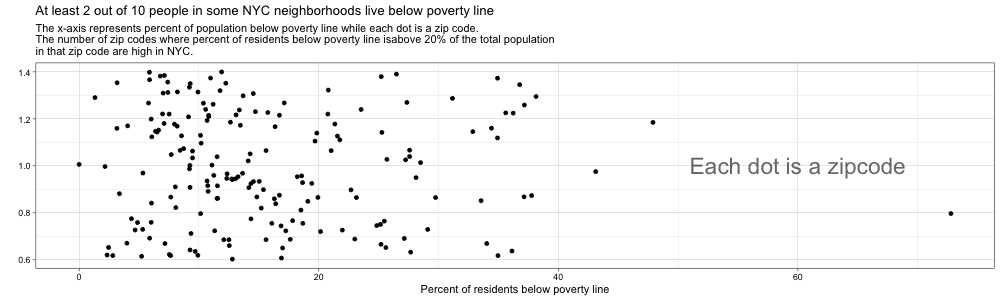

In [13]:
%%R -w 1000 -h 300

#Bonus 2 & 3
#I chose the linedraw theme because ot combined the effect of minimal and default, I think.
#It is clear, yet has grid lines.

ggplot(df) + aes(x=pct_below_poverty, y=1) + geom_jitter() + theme(axis.text.y=element_blank(), axis.ticks.y=element_blank()) + annotate("text", label = "Each dot is a zipcode",
    x = 60, y=1, size = 8, colour = "black", alpha=0.6) + labs(y=" ", x="Percent of residents below poverty line", title = "At least 2 out of 10 people in some NYC neighborhoods live below poverty line", 
         subtitle = "The x-axis represents percent of population below poverty line while each dot is a zip code. 
The number of zip codes where percent of residents below poverty line isabove 20% of the total population 
in that zip code are high in NYC.") + theme_linedraw()

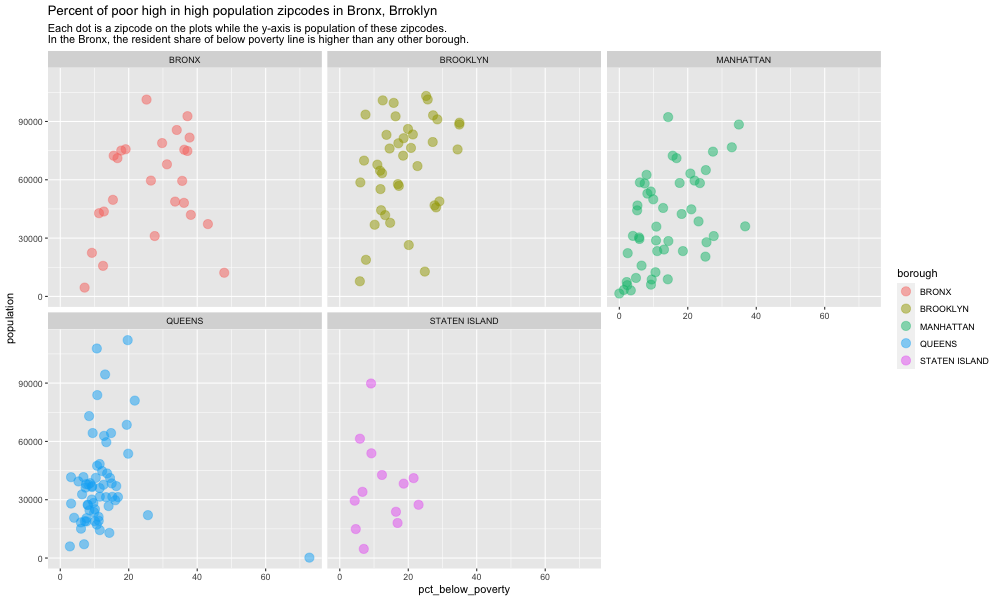

In [17]:
%%R -w 1000 -h 600

ggplot(df) + 
    aes(x=pct_below_poverty, y=population, color=borough) +
    geom_jitter(size = 4, alpha=0.5) + facet_wrap(~borough) + labs(title="Percent of poor high in high population zipcodes in Bronx, Brroklyn", 
                                                                   subtitle="Each dot is a zipcode on the plots while the y-axis is population of these zipcodes. 
In the Bronx, the resident share of below poverty line is higher than any other borough.")

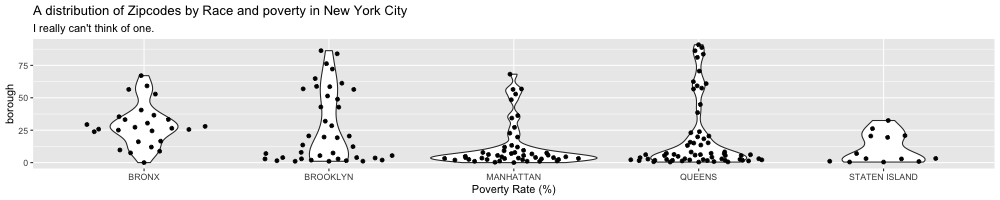

In [24]:
%%R -w 1000 -h 200
library(ggbeeswarm)
ggplot(df) + aes(x=borough, y=pct_black_or_african_american) + geom_violin() + geom_quasirandom() + labs(title="A distribution of Zipcodes by Race and poverty in New York City", subtitle="I really can't think of one.", x="Poverty Rate (%)", y="borough")

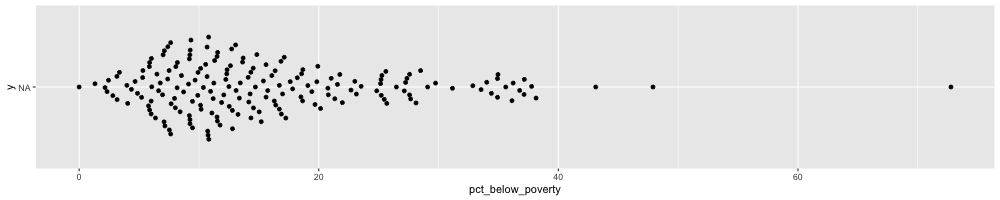

In [33]:
%%R -w 1000 -h 200
require('ggbeeswarm')
ggplot(df) +
    aes(x=pct_below_poverty, y=NA) +
    geom_beeswarm(cex=3)